In [1]:
import vtk
from vtk.util.misc import vtkGetDataRoot

renderer = vtk.vtkRenderer()

render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)

render_window_interactor = vtk.vtkRenderWindowInteractor()
render_window_interactor.SetRenderWindow(render_window)

def load_and_display_vtk(file_path):
    reader = vtk.vtkUnstructuredGridReader() 
    reader.SetFileName(file_path)
    reader.Update()

    mapper = vtk.vtkDataSetMapper()
    mapper.SetInputData(reader.GetOutput())

    actor = vtk.vtkActor()
    actor.SetMapper(mapper)

    renderer.AddActor(actor)

load_and_display_vtk("path_to_your_first_vtk_file.vtk")

load_and_display_vtk("path_to_your_second_vtk_file.vtk")

render_window.Render()
render_window_interactor.Start()


c:\ProgramData\miniforge3\envs\env38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


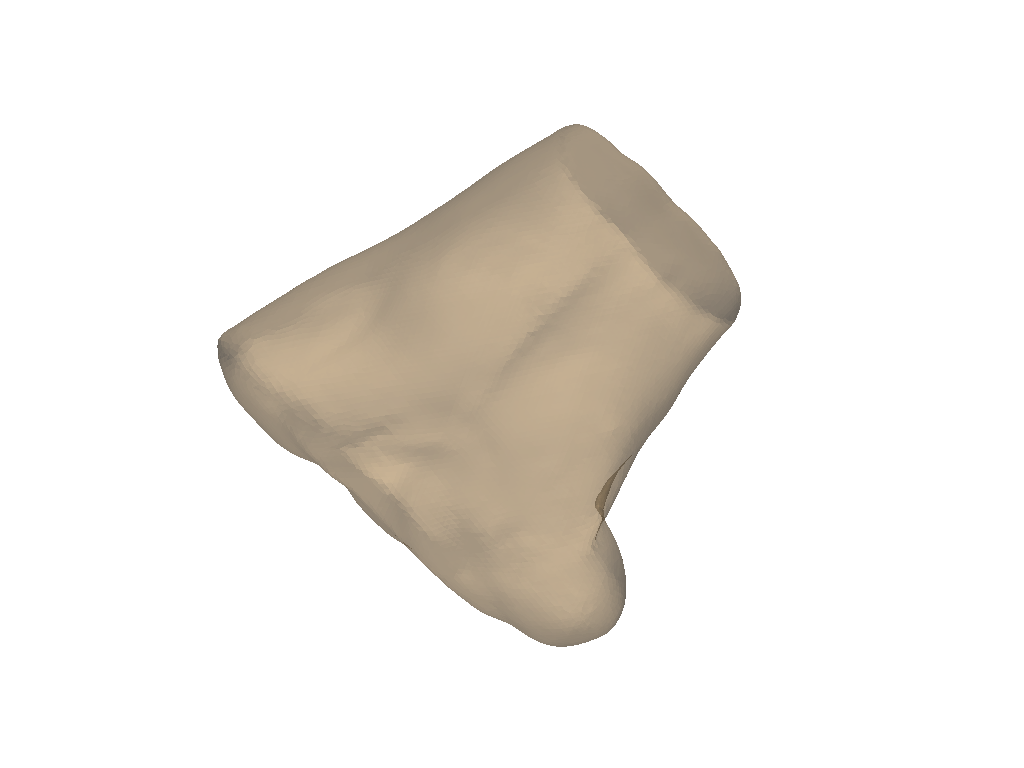

In [2]:
import pyvista as pv

file_path_template = "C:/Users/xuhu/pyvista_test/2019_Lopez_torsoPAP_tetraVol-Labeled/torsoPAP_tetraVol-Labeled_ORIGINAL_full.vtk"
template_torso = pv.read(file_path_template)

template_skin = template_torso.extract_surface()

plotter = pv.Plotter()
plotter.add_mesh(template_skin, color="tan", opacity=0.5) 
plotter.background_color = 'white'
plotter.show()


c:\ProgramData\miniforge3\envs\env38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


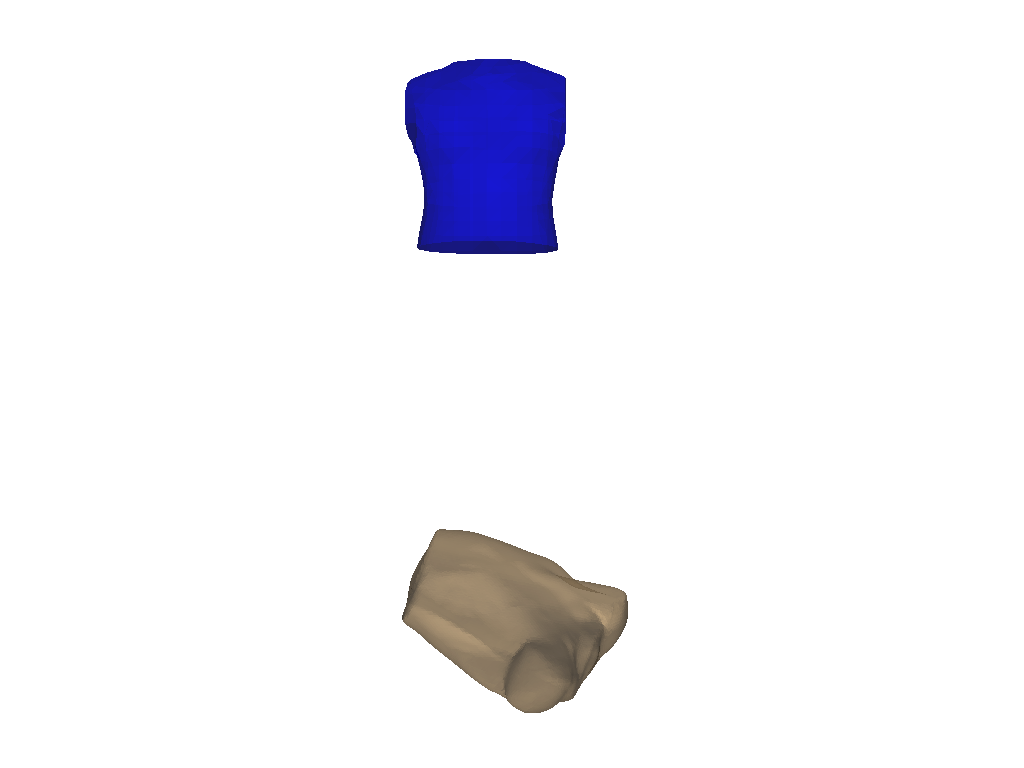

In [3]:
file_path_pca = "PCA_torso_v1.vtk"
PCA_torso = pv.read(file_path_pca)

plotter = pv.Plotter()
plotter.add_mesh(template_skin, color="tan", opacity=0.7)
plotter.add_mesh(PCA_torso, color="blue", opacity=0.7)
plotter.background_color = 'white'

plotter.camera_position = 'xz'
plotter.show()


c:\ProgramData\miniforge3\envs\env38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


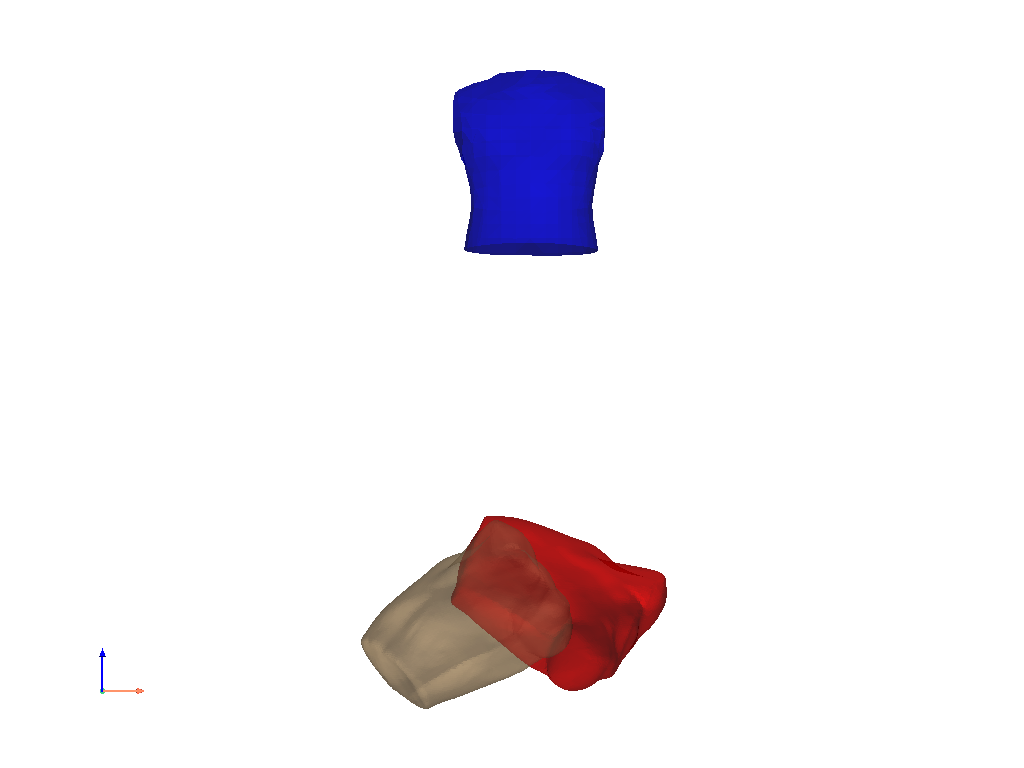

In [49]:
import numpy as np
plotter = pv.Plotter()

plotter.add_mesh(template_skin, color="red", opacity=0.7)
rot = template_skin.copy()


# 创建 y 轴旋转矩阵
angle = -60  # 旋转角度
rotation_matrix = np.array([[np.cos(np.radians(angle)), 0, np.sin(np.radians(angle)), 0],
                           [0, 1, 0, 0],
                           [-np.sin(np.radians(angle)), 0, np.cos(np.radians(angle)), 0],
                           [0, 0, 0, 1]])

# 应用旋转矩阵
rot.transform(rotation_matrix)

plotter.add_mesh(rot, color="tan", opacity=0.7)
plotter.add_mesh(PCA_torso, color="blue", opacity=0.7)
plotter.background_color = 'white'
plotter.camera_position = 'xz'

plotter.add_axes()
plotter.show()

c:\ProgramData\miniforge3\envs\env38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


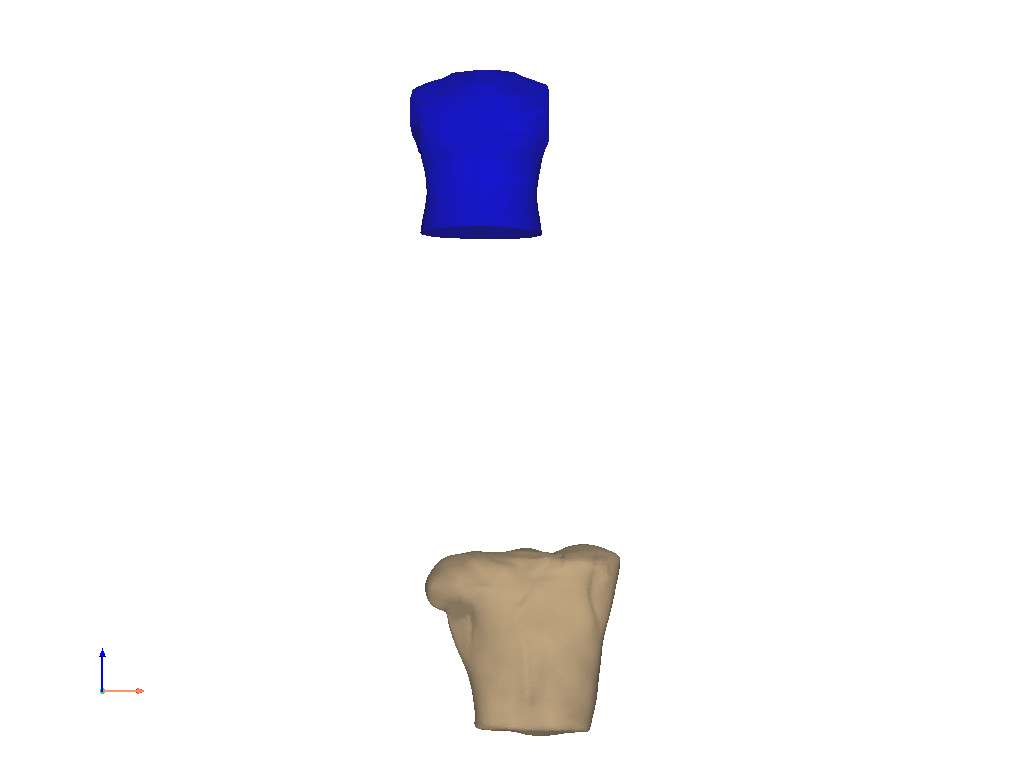

In [137]:
plotter = pv.Plotter()

# plotter.add_mesh(template_skin, color="red", opacity=0.7)
rot = template_skin.copy()


def rotation_matrix_x(angle):
    angle = np.radians(angle)
    return np.array([[1, 0, 0, 0],
                     [0, np.cos(angle), -np.sin(angle), 0],
                     [0, np.sin(angle), np.cos(angle), 0],
                     [0, 0, 0, 1]])

def rotation_matrix_y(angle):
    angle = np.radians(angle)
    return np.array([[np.cos(angle), 0, np.sin(angle), 0],
                     [0, 1, 0, 0],
                     [-np.sin(angle), 0, np.cos(angle), 0],
                     [0, 0, 0, 1]])

def rotation_matrix_z(angle):
    angle = np.radians(angle)
    return np.array([[np.cos(angle), -np.sin(angle), 0, 0],
                     [np.sin(angle), np.cos(angle), 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])


combined_rotation_matrix = rotation_matrix_x(115) @ rotation_matrix_y(50) @ rotation_matrix_z(60)


# 应用旋转矩阵
rot.transform(combined_rotation_matrix)
rot.translate((50, 1, 20), inplace=False)

plotter.add_mesh(rot, color="tan", opacity=0.7)
plotter.add_mesh(PCA_torso, color="blue", opacity=0.7)
plotter.background_color = 'white'

plotter.camera_position = 'xz'

plotter.add_axes()

plotter.show()




In [130]:
rot.center

[116.02360534667969, -164.1898045539856, -1.1883010864257812]

c:\ProgramData\miniforge3\envs\env38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


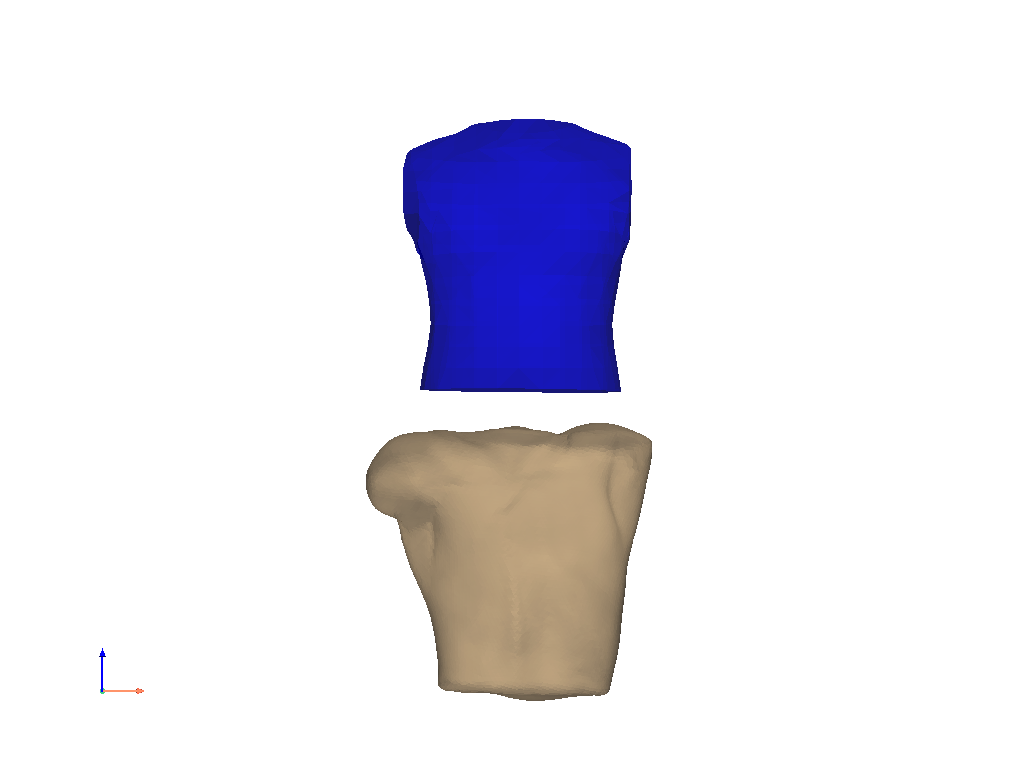

In [188]:
plotter = pv.Plotter()

tran = rot.copy()

# translation_vector = [0, 0, 900]  
# tran.translate(translation_vector)

translation_matrix = np.array([[0.85, 0, 0, -110],
                              [0, 0.85, 0, 0],
                            #   [0, 0, 0.85, 1260],  # translation 50
                              [0, 0, 0.85, 800],
                              [0, 0, 0, 1]])

tran.transform(translation_matrix)


plotter.add_mesh(tran, color="tan", opacity=0.7)
plotter.add_mesh(PCA_torso, color="blue", opacity=0.7)
plotter.background_color = 'white'

plotter.camera_position = 'xz'

plotter.add_axes()

plotter.show()

c:\ProgramData\miniforge3\envs\env38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


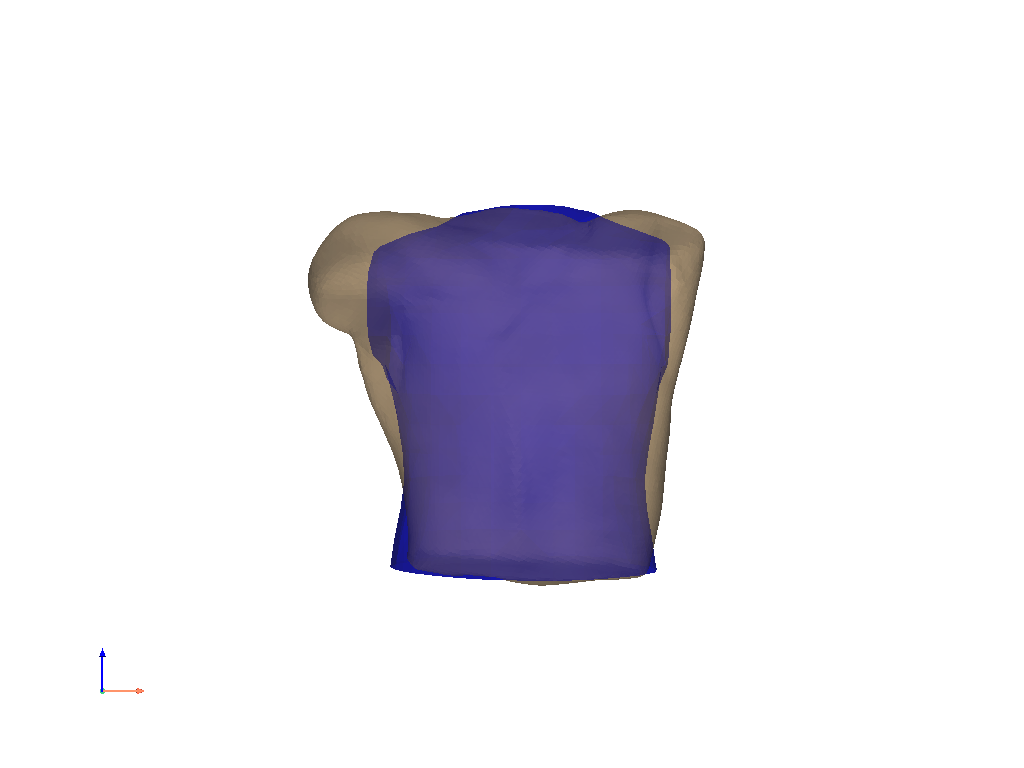

In [189]:
plotter = pv.Plotter()

tran = rot.copy()

# translation_vector = [0, 0, 900]  
# tran.translate(translation_vector)

translation_matrix = np.array([[0.85, 0, 0, -110],
                              [0, 0.85, 0, 0],
                              [0, 0, 0.85, 1260],  # translation 50
                            #   [0, 0, 0.85, 800],
                              [0, 0, 0, 1]])

tran.transform(translation_matrix)


plotter.add_mesh(tran, color="tan", opacity=0.7)
plotter.add_mesh(PCA_torso, color="blue", opacity=0.7)
plotter.background_color = 'white'

plotter.camera_position = 'xz'

plotter.add_axes()

plotter.show()

ERROR:root:Update: Source and Target Landmarks contain a different number of points
c:\ProgramData\miniforge3\envs\env38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


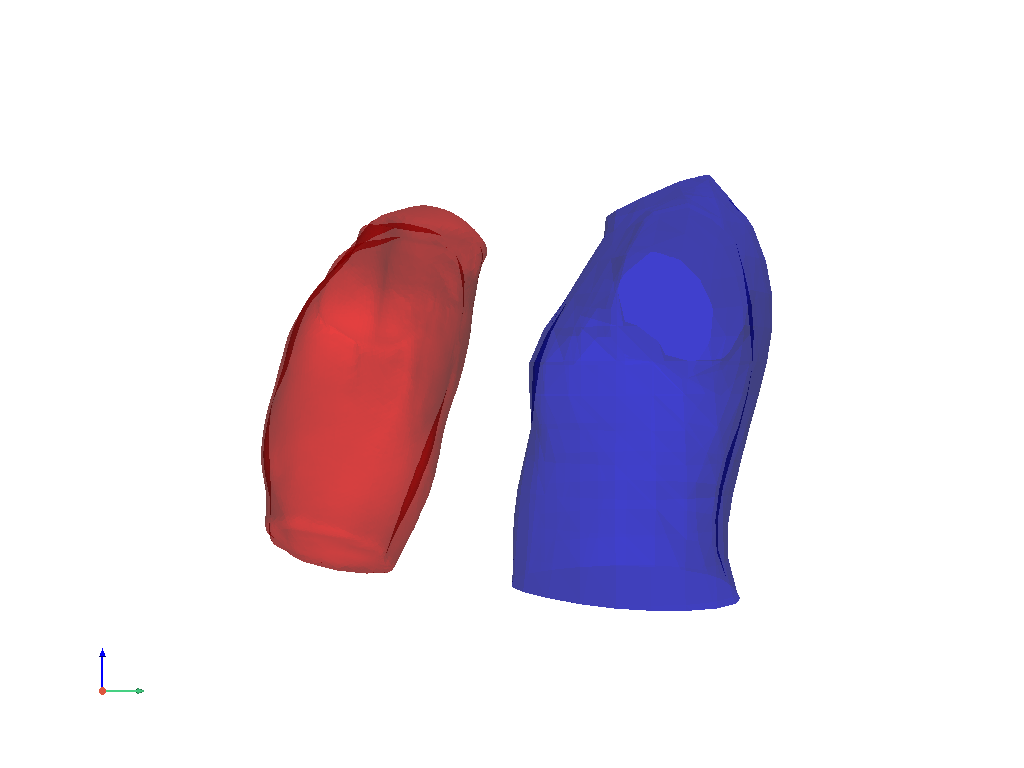

In [170]:
import pyvista as pv
from vtk import vtkLandmarkTransform, vtkPoints, vtkTransform

fix_cloud = pv.PolyData(PCA_torso)
move_cloud = pv.PolyData(tran)

# p = pv.Plotter()
# p.add_mesh(fix_cloud, color="red", point_size=10, render_points_as_spheres=True)
# p.add_mesh(model.mesh, color="red", opacity=0.3)
# p.add_mesh(move_cloud, color="blue", point_size=10, render_points_as_spheres=True)
# p.add_mesh(heart, color="blue", opacity=0.3)
# p.show()

fix_vtk_points = vtkPoints()
for point in fix_cloud.points:
    fix_vtk_points.InsertNextPoint(point)

move_vtk_points = vtkPoints()
for point in move_cloud.points:
    move_vtk_points.InsertNextPoint(point)


"""
establish the mapping relationship between the two spaces
vtkLandmarkTransform facilitates mapping points 
between spaces based on 
user-defined landmark correspondences
"""
landmark_transform = vtkLandmarkTransform()
landmark_transform.SetSourceLandmarks(fix_vtk_points)
landmark_transform.SetTargetLandmarks(move_vtk_points)
landmark_transform.SetModeToAffine()
landmark_transform.Update()

matrix = landmark_transform.GetMatrix()

vtk_transform = vtkTransform()
vtk_transform.SetMatrix(matrix)

# transformed_move_cloud = move_cloud.copy()
# transformed_move_cloud.transform(vtk_transform)


# moving_model = heart.copy()

moving_model = move_cloud.copy()
moving_model.transform(vtk_transform)

p2 = pv.Plotter()

p2.add_mesh(fix_cloud, color="blue", opacity=0.5)
p2.add_mesh(moving_model, color="red", opacity=0.5)
# p2.add_mesh(moving_model, color="red", opacity=0.5)
# p2.add_mesh(model.mesh, color="blue", opacity=0.5)

p2.background_color = "white"
p2.camera_position = 'yz'

p2.add_axes()

p2.show()

c:\ProgramData\miniforge3\envs\env38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


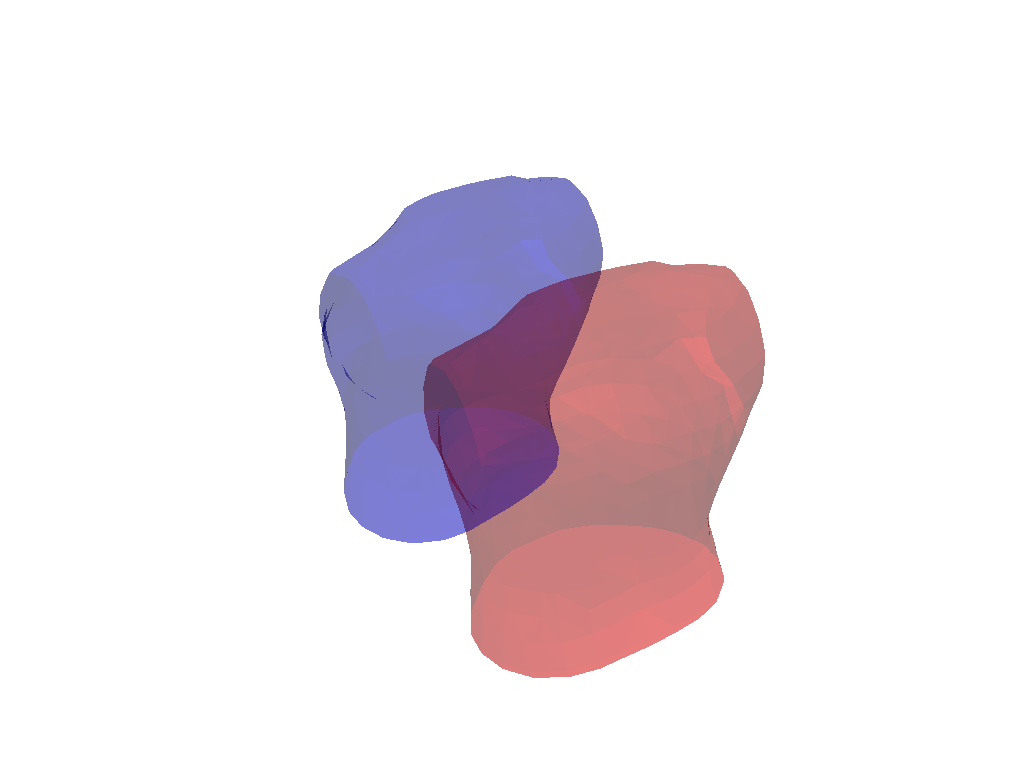

In [172]:
from vtk import vtkIterativeClosestPointTransform

# moving_model = transformed_model.copy()
mesh_a = move_cloud.copy() # moving model
mesh_b = fix_cloud.copy() #  fixed moded

icp = vtkIterativeClosestPointTransform()
icp.SetSource(mesh_a)
icp.SetTarget(mesh_b)

# Adjust parameters
icp.GetLandmarkTransform().SetModeToRigidBody()
icp.SetMaximumNumberOfLandmarks(1000)
icp.SetMaximumMeanDistance(0.0001)
icp.SetMaximumNumberOfIterations(1000)
icp.CheckMeanDistanceOn()
icp.StartByMatchingCentroidsOn()

model_h = mesh_b.copy()
aligned = model_h.transform(icp.GetMatrix())

p2 = pyvista.Plotter()


# p2.add_mesh(transformed_model, color="purple", opacity=0.3)
p2.add_mesh(mesh_b, color="blue", opacity=0.3) # orginal model
p2.add_mesh(aligned, color="red", opacity=0.3) 

# Set the background color and show the plotter
p2.background_color = "white"
p2.show()


c:\ProgramData\miniforge3\envs\env38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


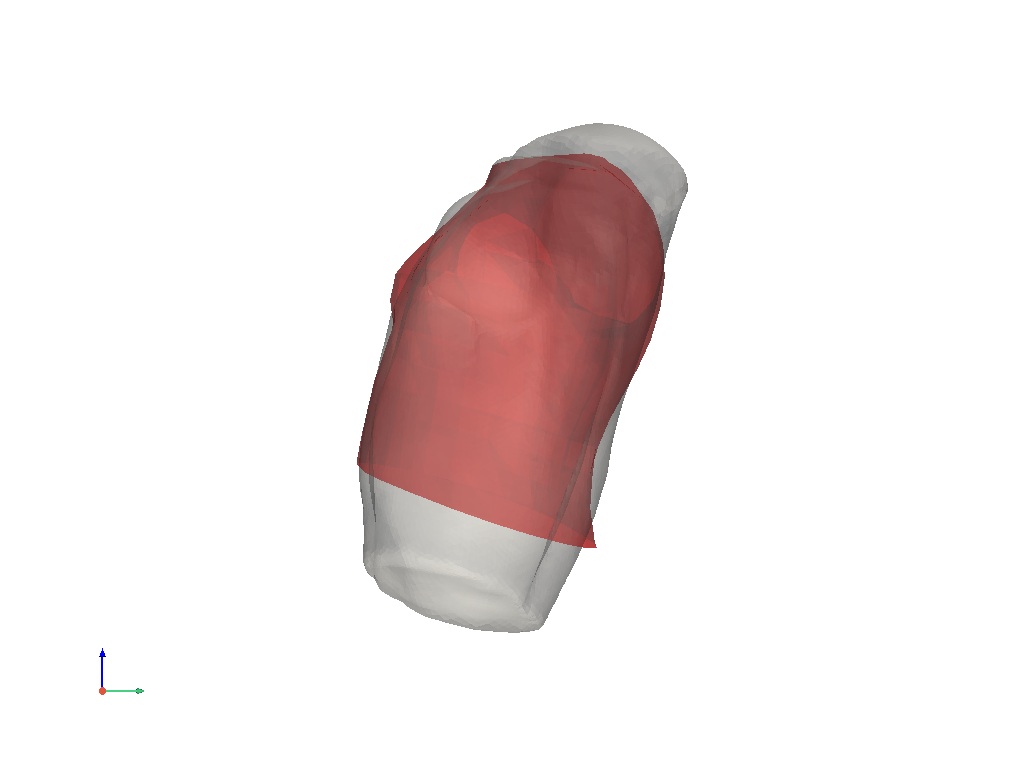

In [177]:
import pyvista as pv
import vtk

def register_icp(source, target, num_iterations=100):
    icp = vtk.vtkIterativeClosestPointTransform()
    icp.SetSource(source)
    icp.SetTarget(target)
    icp.GetLandmarkTransform().SetModeToAffine()
    icp.SetMaximumNumberOfIterations(num_iterations)
    icp.StartByMatchingCentroidsOn()
    icp.Update()
    
    icp_transform_filter = vtk.vtkTransformPolyDataFilter()
    icp_transform_filter.SetInputData(source)
    icp_transform_filter.SetTransform(icp)
    icp_transform_filter.Update()
    
    return pv.wrap(icp_transform_filter.GetOutput())

# 加载模板和目标网格
template_mesh = fix_cloud
target_mesh = move_cloud

# 执行 ICP 配准
registered_mesh = register_icp(template_mesh, target_mesh)

# 可视化结果
p = pv.Plotter()
p.add_mesh(target_mesh, color='white', opacity=0.5)
p.add_mesh(registered_mesh, color='red', opacity=0.5)
p.show_axes()
p.background_color = "white"
p.camera_position = 'yz'

p.show()


In [184]:
from vtkmodules.vtkCommonDataModel import vtkIterativeClosestPointTransform

icp = vtkIterativeClosestPointTransform()
icp.SetSource(tran)
icp.SetTarget(PCA_torso)
icp.GetLandmarkTransform().SetModeToRigidBody()
icp.SetMaximumNumberOfLandmarks(100)
icp.SetMaximumMeanDistance(.00001)
icp.SetMaximumNumberOfIterations(500)
icp.CheckMeanDistanceOn()
icp.StartByMatchingCentroidsOn()
icp.Update()

aligned = tran.transform(icp.GetMatrix())

c:\ProgramData\miniforge3\envs\env38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


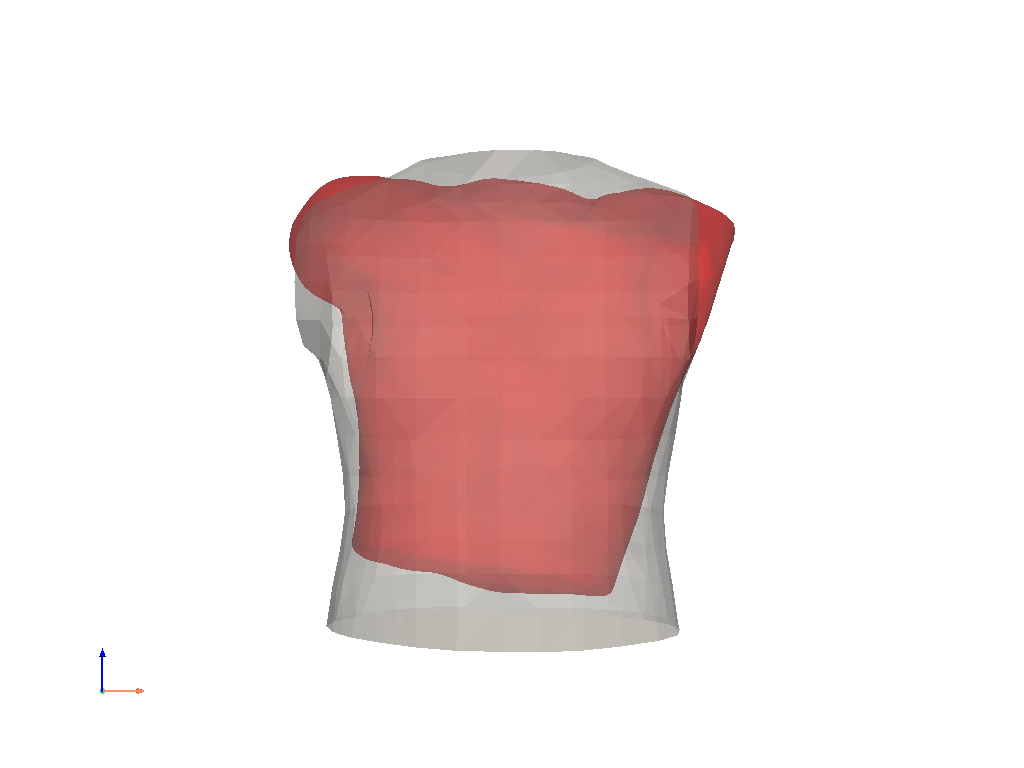

In [185]:
p = pv.Plotter()
p.add_mesh(PCA_torso, color='white', opacity=0.5)
p.add_mesh(aligned, color='red', opacity=0.5)
p.show_axes()
p.background_color = "white"
p.camera_position = 'xz'

p.show()
